## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 

In [ ]:

1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [82]:
## Import libraries 

import pandas as pd
import seaborn as sns

# Load the dataset
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##CHECK FOR MISSING DATA AND INFO

In [19]:
titanic_df.info()

titanic_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

***Explorotary data analysis***

In [76]:
##Survival by Sex

titanic_df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [72]:
##Survival by Passanger class

titanic_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [78]:
##Survival by Age
titanic_df.groupby('Age')['Survived'].mean()

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

**Hypothesis Testing**


*1. Are women likely to survive than men?*


In [31]:
titanic_df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

*2. Do higher-class passengers (Pclass 1) have better survival rates?*

In [46]:
titanic_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

*3. Are younger passengers more likely to survive?*

In [49]:
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0, 12, 18, 35, 50, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
titanic_df.groupby('AgeGroup')['Survived'].mean()

/var/folders/05/zkgstjh96_980ctc1m64nkhh0000gn/T/ipykernel_60878/279543860.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby('AgeGroup')['Survived'].mean()


AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.382682
Adult          0.398693
Senior         0.343750
Name: Survived, dtype: float64

**Visualization 1: Survival Rate by Gender**

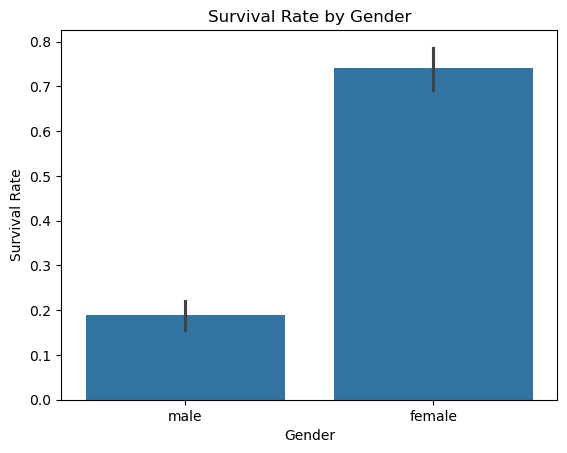

In [52]:
sns.barplot(x=titanic_df['Sex'], y=titanic_df['Survived'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

**Visualization 2: Survival Rate by Passenger Class (Pclass)**

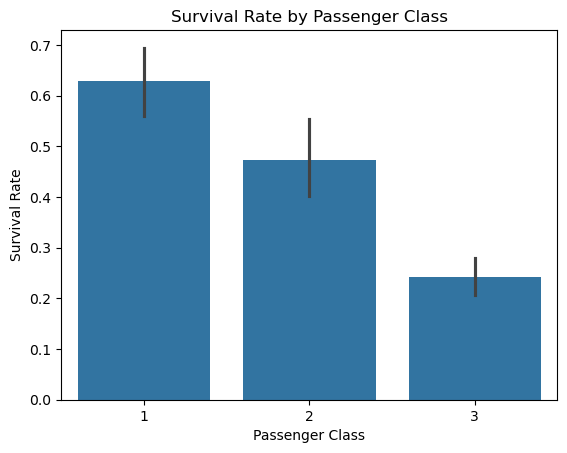

In [57]:
sns.barplot(x=titanic_df['Pclass'], y=titanic_df['Survived'])
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

**Visualization 3: Age Distribution of Survivors vs Non-Survivors**

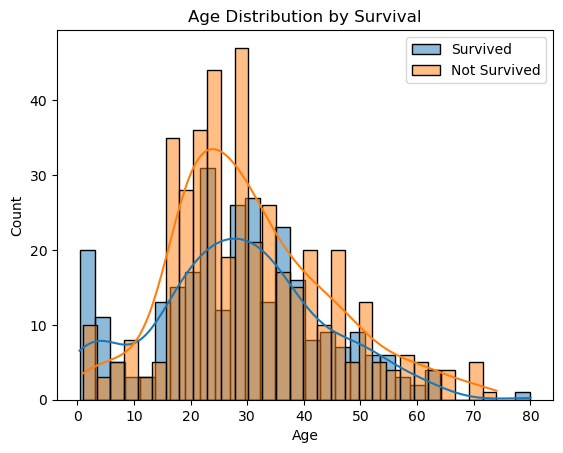

In [60]:
sns.histplot(titanic_df[titanic_df['Survived'] == 1]['Age'].dropna(), bins=30, kde=True, label='Survived')
sns.histplot(titanic_df[titanic_df['Survived'] == 0]['Age'].dropna(), bins=30, kde=True, label='Not Survived')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Survival')
plt.show()